In [1]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# from scipy.spatial.distance import cdist
from sklearn import metrics
import numpy.matlib
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import math
tqdm.pandas()

In [2]:
df = pd.read_csv('./dataset/2020-02-road-1-in.csv',parse_dates=["datetime"])
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime
0,2020-02-01 00:00:34,1,19,in,0,0,1,0,0,0,0,0
1,2020-02-01 00:00:34,1,26,in,1,0,0,1,71,71,0,0
2,2020-02-01 00:00:34,1,28,in,3,1,1,2,41,48,0,0
3,2020-02-01 00:00:34,1,29,in,3,3,3,0,75,108,0,0
4,2020-02-01 00:00:34,1,30,in,5,5,3,0,32,56,62,66
...,...,...,...,...,...,...,...,...,...,...,...,...
22694507,2020-02-29 23:59:14,1,939,in,1,0,0,1,20,20,0,0
22694508,2020-02-29 23:59:14,1,941,in,0,0,1,0,0,0,0,0
22694509,2020-02-29 23:59:14,1,959,in,1,1,0,0,47,47,60,60
22694510,2020-02-29 23:59:14,1,960,in,0,0,1,0,0,0,0,0


In [4]:
df.max(axis=0)

datetime          2020-02-29 23:59:14
road_number                         1
km                                993
direction                          in
all_units                         109
inflow_units                       46
outflow_unit                       44
samecell_units                     84
avg_speed                          80
max_speed                         240
avg_traveltime                    998
max_traveltime                    999
dtype: object

In [4]:
X = df[['inflow_units','outflow_unit','avg_speed']].values
X

array([[ 0,  1,  0],
       [ 0,  0, 71],
       [ 1,  1, 41],
       ...,
       [ 1,  0, 47],
       [ 0,  1,  0],
       [ 0,  0, 65]], dtype=int64)

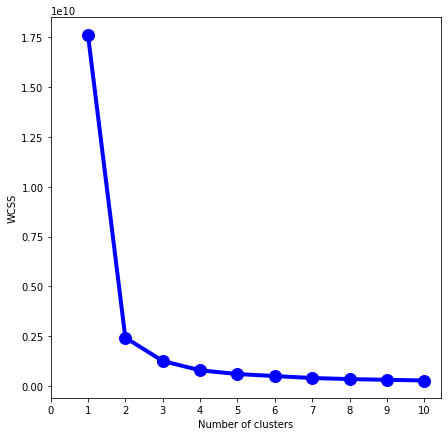

In [5]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
model = KMeans(n_clusters = 4,init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)

C:\Users\NITIKORN\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

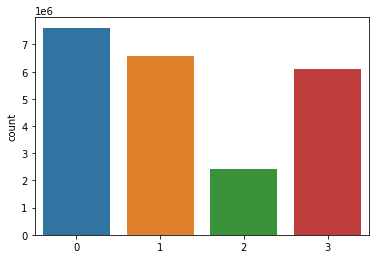

In [11]:
sns.countplot(y_clusters)

In [12]:
print(X[y_clusters == 0,0][0])
print(X[y_clusters == 0,1][0])
print(X[y_clusters == 0,2][0])

5
6
53


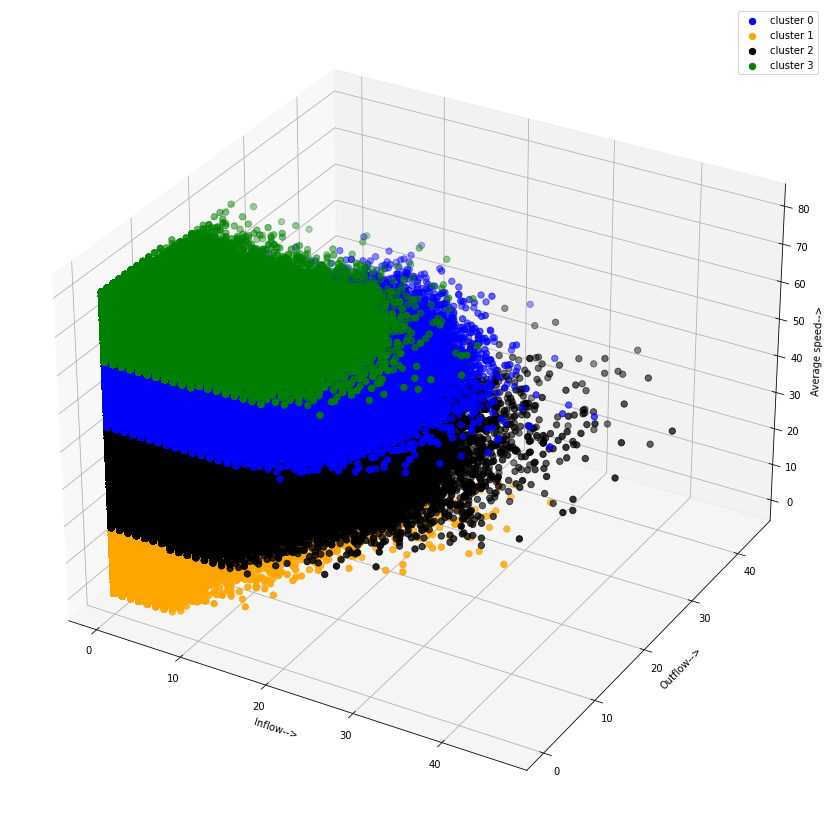

In [13]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = 'black', label = "cluster 2")
ax.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = 'green', label = "cluster 3")
ax.set_xlabel('Inflow-->')
ax.set_ylabel('Outflow-->')
ax.set_zlabel('Average speed-->')
ax.legend()
plt.show()